Mục đích: chuẩn bị công cụ để xử lý dữ liệu & trực quan hóa

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# hiển thị đẹp hơn
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="muted")


Mục đích: đọc file CSV gốc

In [2]:
df = pd.read_csv("../data/raw/Placement_Data_Full_Class.csv")

print("Kích thước dữ liệu:", df.shape)
df.head()


Kích thước dữ liệu: (215, 15)


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Mục đích: xem kiểu dữ liệu, số null, kiểu dữ liệu từng cột

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


Mục đích: phát hiện dữ liệu bị thiếu

In [5]:
df.isnull().sum()


sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

Mục đích: xem phân phối các cột số (ssc_p, hsc_p, degree_p, etest_p, mba_p, salary)

In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
sl_no,215.0,108.000000,62.209324,1.00,54.500,108.0,161.500,215.00
ssc_p,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_p,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_p,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
etest_p,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_p,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89
salary,148.0,288655.405405,93457.452420,200000.00,240000.000,265000.0,300000.000,940000.00


Mục đích: xem tỷ lệ Placed/Not Placed, có cân bằng lớp không

In [7]:
df['status'].value_counts(normalize=True) * 100


status
Placed        68.837209
Not Placed    31.162791
Name: proportion, dtype: float64

Mục đích: quan sát phân phối các điểm %

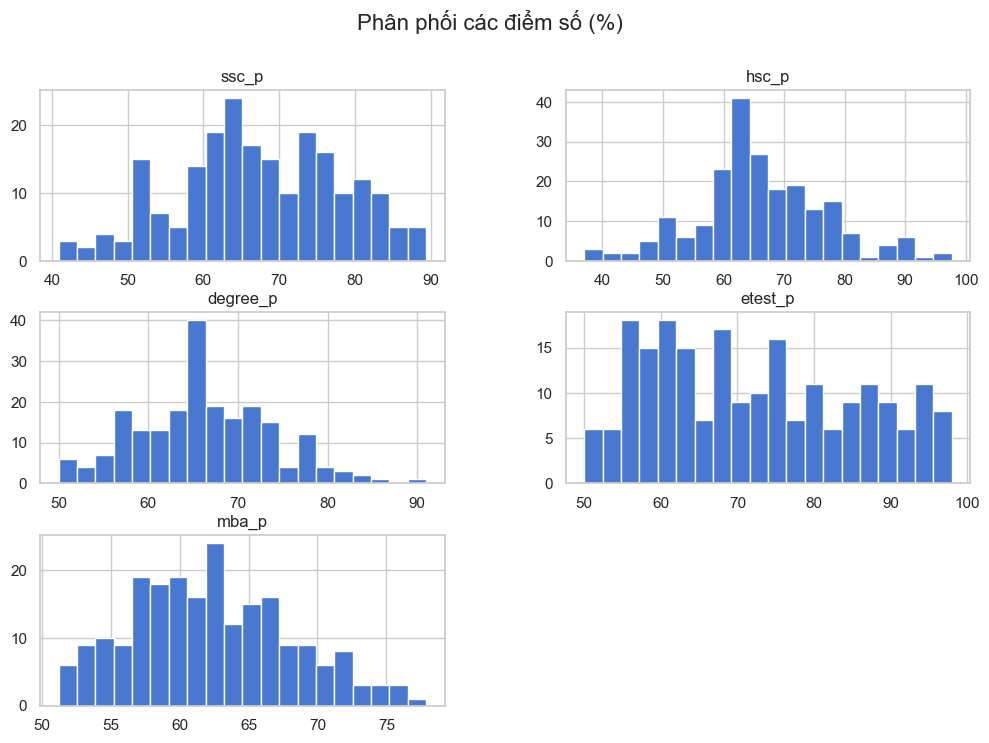

In [8]:
num_cols = ["ssc_p", "hsc_p", "degree_p", "etest_p", "mba_p"]
df[num_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Phân phối các điểm số (%)", fontsize=16)
plt.show()


Mục đích: xem có outlier bất thường không

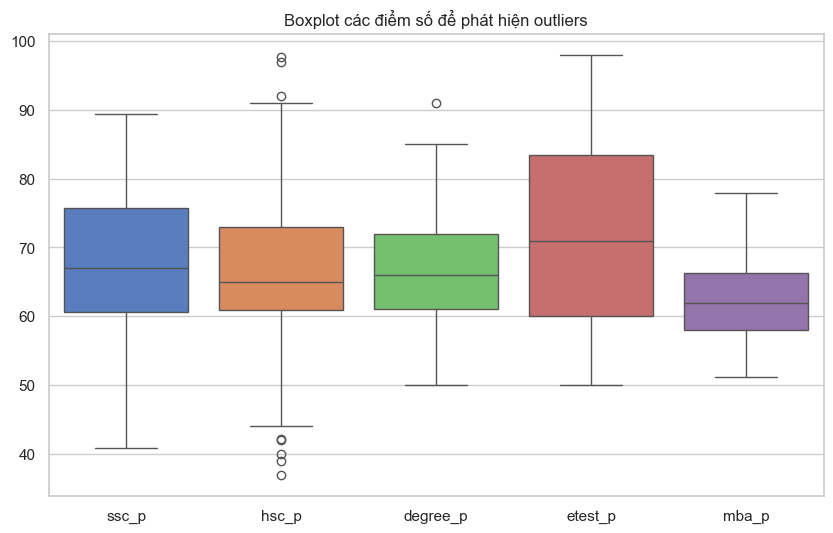

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot các điểm số để phát hiện outliers")
plt.show()


Mục đích: xem mối tương quan giữa các biến numeric

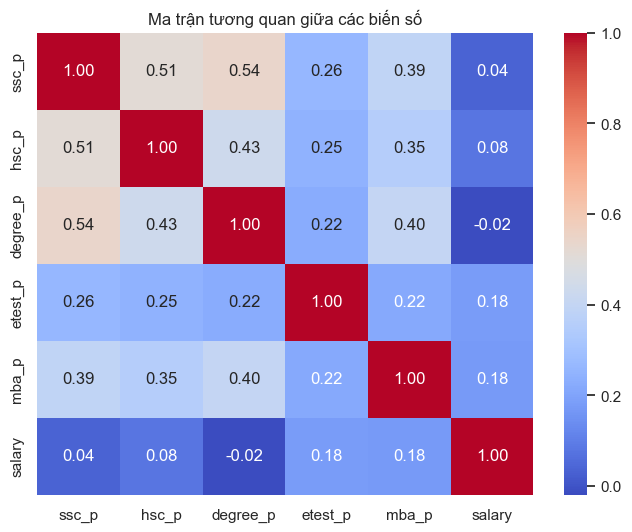

In [10]:
plt.figure(figsize=(8,6))
corr = df[num_cols + ["salary"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các biến số")
plt.show()
